In this notebook I compute the frequency of which pixels exceed certain precipitation intensity threshold. This could be an indication 

In [6]:
from os import listdir
from os.path import isfile, join
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap


import netCDF4

from pyproj import Proj, transform
from mpl_toolkits.basemap import Basemap

from radarplot import plot_on_map

In [2]:
radar_dir = '/nobackup_1/users/schreurs/project_GAN/dataset_aart_np/'
files = sorted([f for f in listdir(radar_dir) if isfile(join(radar_dir, f)) and f.startswith('2019')])
print(len(files))

105119


In [3]:
# Threshold values in 0.01mm
# 0.3mm, 3mm, 30mm, 100mm (50dBZ) heavy rain/small hail, 200mm (~60dBZ) extreme hail
thresholds = [30, 300, 3000, 10000, 20000] 

In [22]:
# count_exceed = np.zeros((len(thresholds), 765,700))
# count_sum = 0
# error_count=0
# max_val = 0
for f in tqdm(files[10000:]):
    try:
        rdr = np.load(radar_dir+f)
        rdr[rdr==6553500] = 0
        if rdr[0][0] != 0:
            print(rdr[0][0])
    except:
        print(f)
        error_count=+1
        rdr = np.zeros((765,700))
        
    for i, thresh in enumerate(thresholds):
        count_exceed[i] += rdr>thresh
    if np.max(rdr) > max_val:
        max_val=np.max(rdr)
    count_sum += 1


100%|██████████| 95119/95119 [2:02:44<00:00, 12.92it/s]  


In [23]:
count_sum

105119

In [24]:
np.save('aart_clutter.npy', count_exceed)

In [4]:
count_exceed = np.load('aart_clutter.npy')

In [25]:
print('Errors: ', error_count)
print(max_val)

Errors:  0
18494


In [26]:
max_val

18494

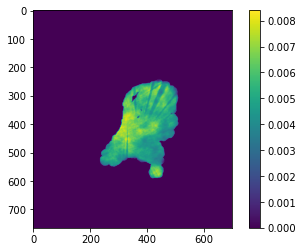

In [27]:
plt.imshow(count_exceed[0]/count_sum, cmap='viridis')
plt.colorbar()

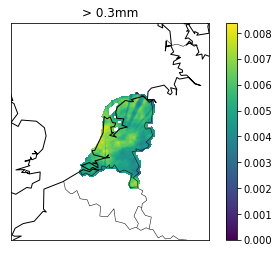

In [7]:
i=0
plot_on_map(count_exceed[i]/105119, ftype='.nc')
plt.title('> {}mm'.format(thresholds[i]/100))
plt.savefig('figures/aart_freq_above_03mm')

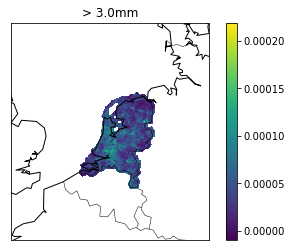

In [9]:
i=1
plot_on_map(count_exceed[i]/105119, ftype='.nc')
plt.title('> {}mm'.format(thresholds[i]/100))
plt.savefig('figures/aart_freq_above_3mm')

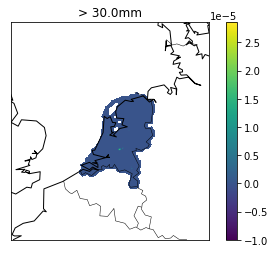

In [10]:
i=2
plot_on_map(count_exceed[i]/105119, ftype='.nc')
plt.title('> {}mm'.format(thresholds[i]/100))
plt.savefig('figures/aart_freq_above_30mm')

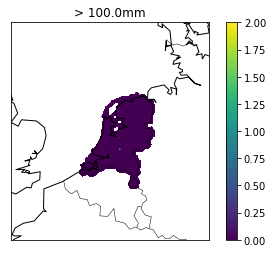

In [11]:
i=3
plot_on_map(count_exceed[i], ftype='.nc')
plt.title('> {}mm'.format(thresholds[i]/100))
plt.savefig('figures/aart_freq_above_100mm')

<ipython-input-9-4ce9354d1def>:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  iso_dict = ds['iso_dataset'].__dict__


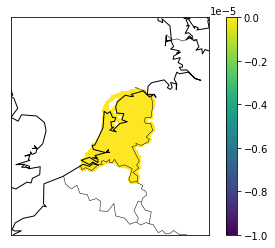